In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Preprocessing & EDA

In [3]:
#checking the size of the dataset
df.shape

(8425, 23)

In [4]:
#checking the columns of the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

We have 23 columns in the dataset. we have to predict the rainfall for toromorrow and the amount of rainall. we will see the co relation of all the features with these two targets and see if all the features are related.

In [5]:
#getting an overall overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
# Column Data Types
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

We can see that all the columns in the dataset are either float datatype or object datatype.

In [7]:
#checking the unique numbers of the dataset
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

By looking at these unique types we can say one of our target variable 'RainTomorrow' has 2 classes making it a classification problem while predicting tomorrows rainfall and the other target Rainfall is a continuous data making it a regression problem.

In [8]:
#checkig the null values of the dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

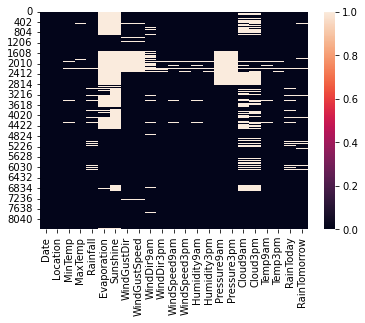

In [11]:
sns.heatmap(df.isnull())

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
#Extracting Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

#Extracting Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

#Extracting Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

In [14]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [15]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [16]:
#Treating the Null Values by Imputation

#Filling the missing values in categorical columns with the mode of respective columns.
#Filling the missing values in numerical columns with the mean of respective columns.

#Filling null values in MinTemp with it's mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Fillinf null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])




In [17]:
#checkig again the null values of the dataset
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [18]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

There is a huge difference in 75% amd max it shows that huge outliers are present in the columns.



# Data Visualization

In [19]:
# Categorical Columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


# Uni-Variate Analysis

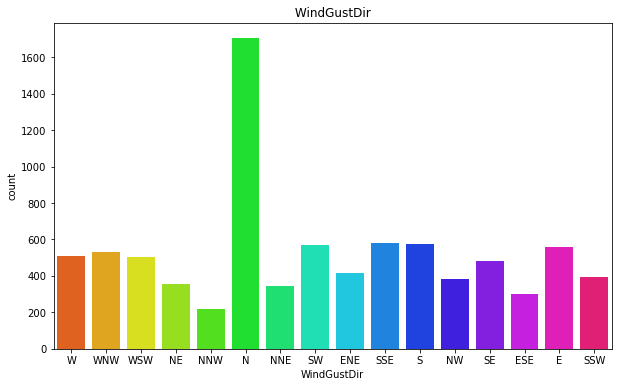

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(df['WindGustDir'],palette='hsv')
plt.title(" WindGustDir ")
plt.show()

We can clearly see that the wind gust was strongest towards the north, followed by the SW, SSE, S,WNW.

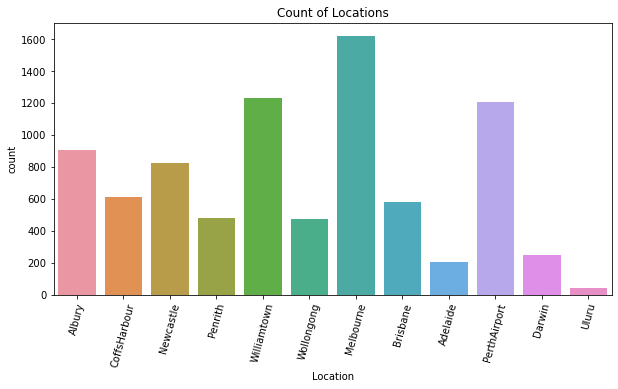

In [22]:
# Visualizing the various Locations present in the dataset
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

We have the highest rainfall data from Melbourbne and least from Uluru

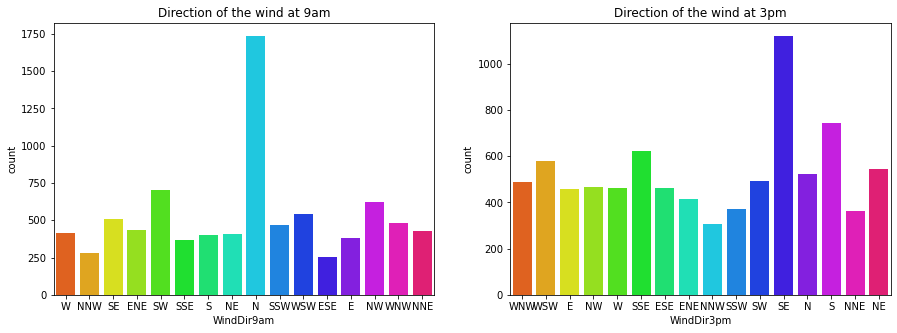

In [23]:
#Visualization of wind at 9 am and 3pm.
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'],palette='hsv')
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'],palette='hsv')
plt.show()

In the plots we can clearly see that the wing direction was towards the N at 9am and in the SE at 3pm

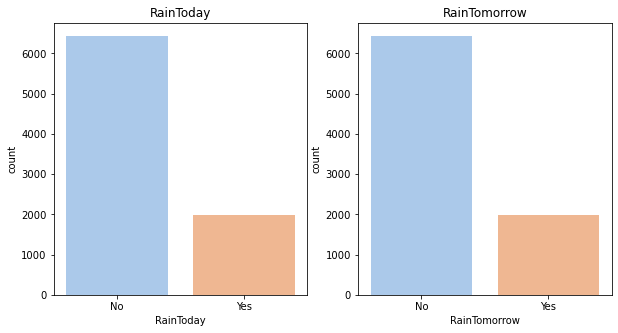

In [24]:
#Visualization of Rainfall today and tomorrow:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

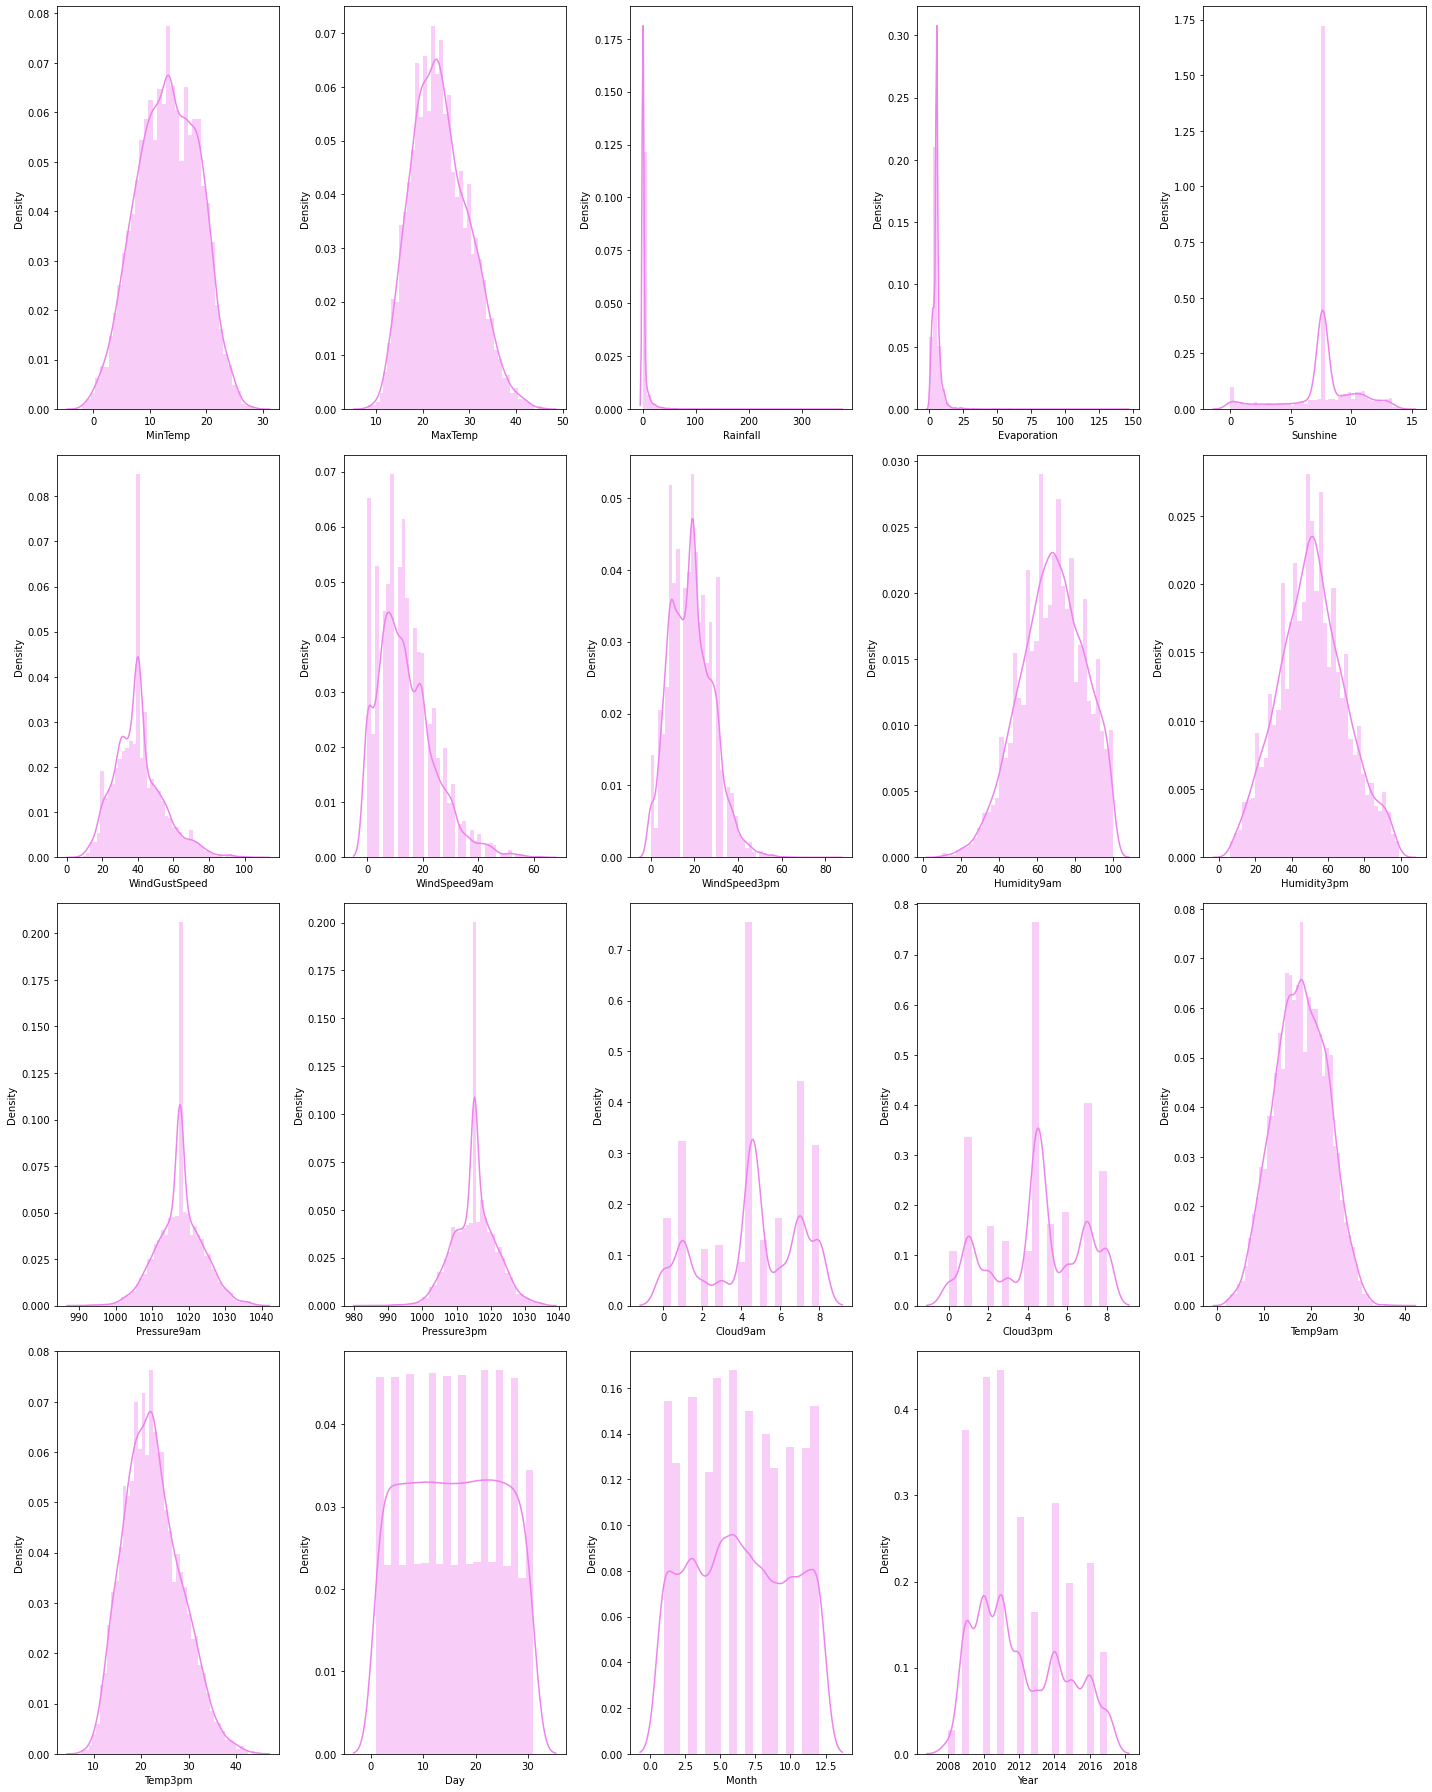

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(df[column],color="violet")
        plt.xlabel(column,fontsize=10)
    
    plotnumber+=1
plt.tight_layout()

From the graphs we can say that the dataset is not normally distributed.

Min Temp is normally distributed

Max Temp is slightly skewed right

Rainfall is skewed right

Evaporation is skewed right

Sunshine is not normally distributed

WindGustSpeed, WindSpeed9am,WindSpeed3pm is skewed right

# Bivariate Analysis

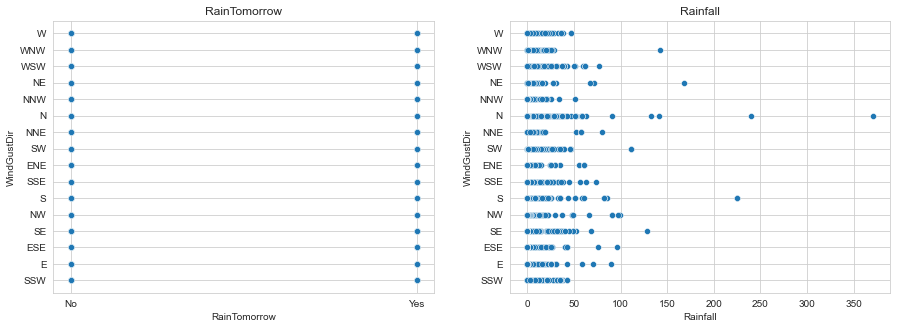

In [38]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

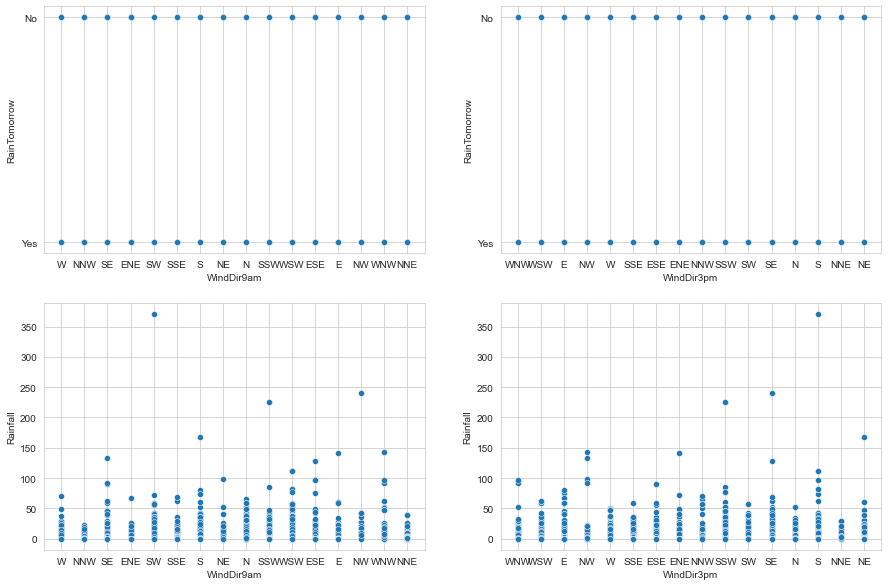

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

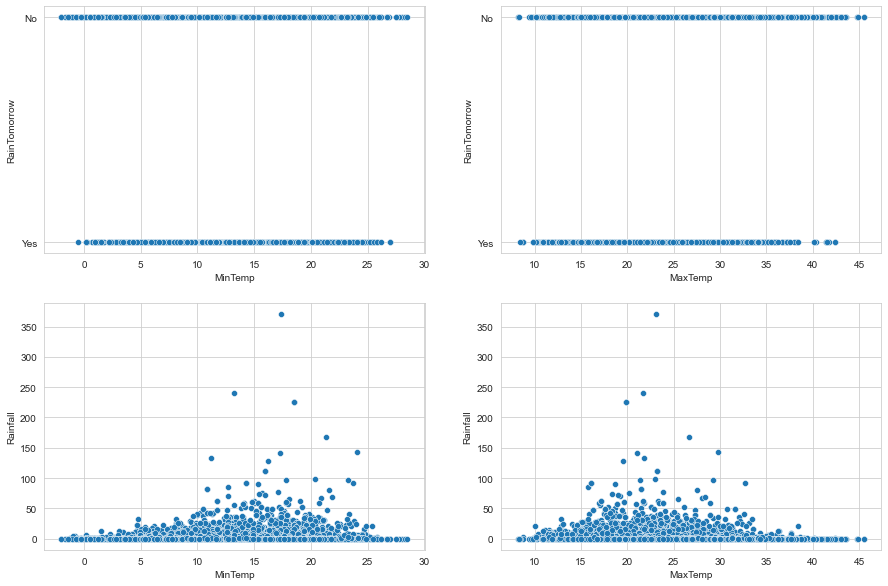

In [40]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We can clearly see from the plotted graphs that there is no linear relation of max temp and min temp with both the targets

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

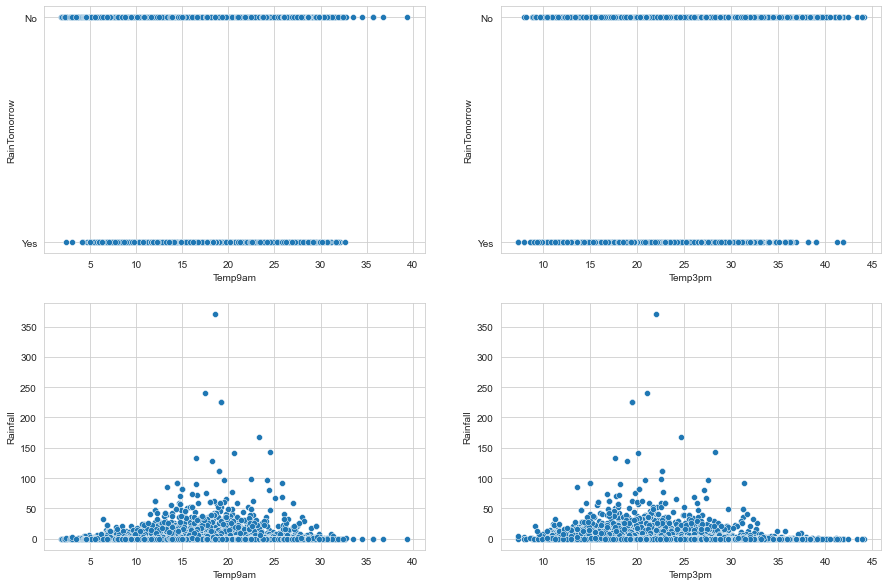

In [41]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

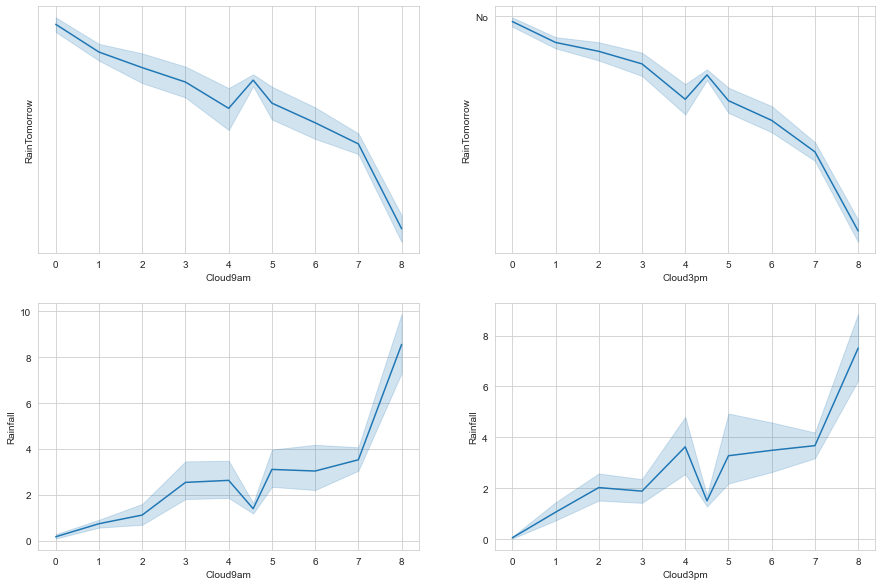

In [43]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

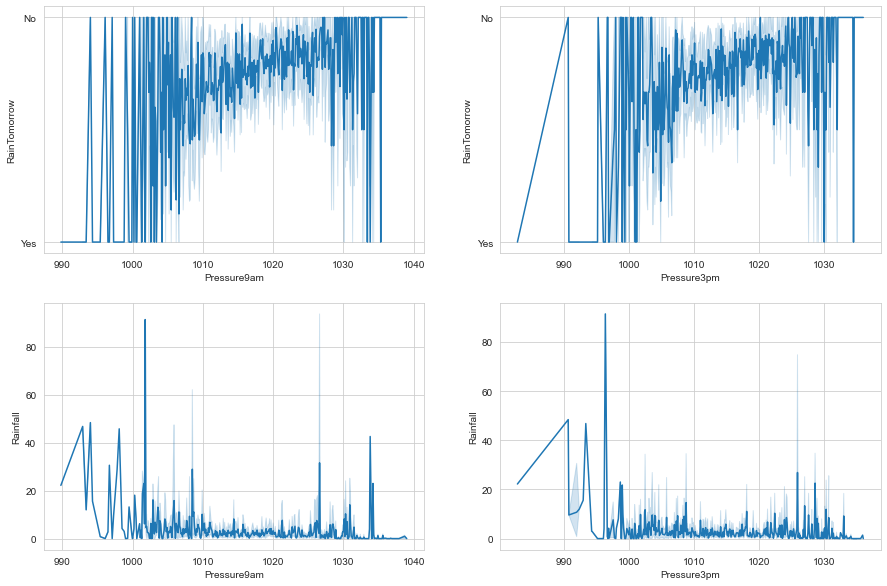

In [46]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Pressure9am and Rainfall
sns.lineplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

As the graph shows, we dont see an linear relation

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

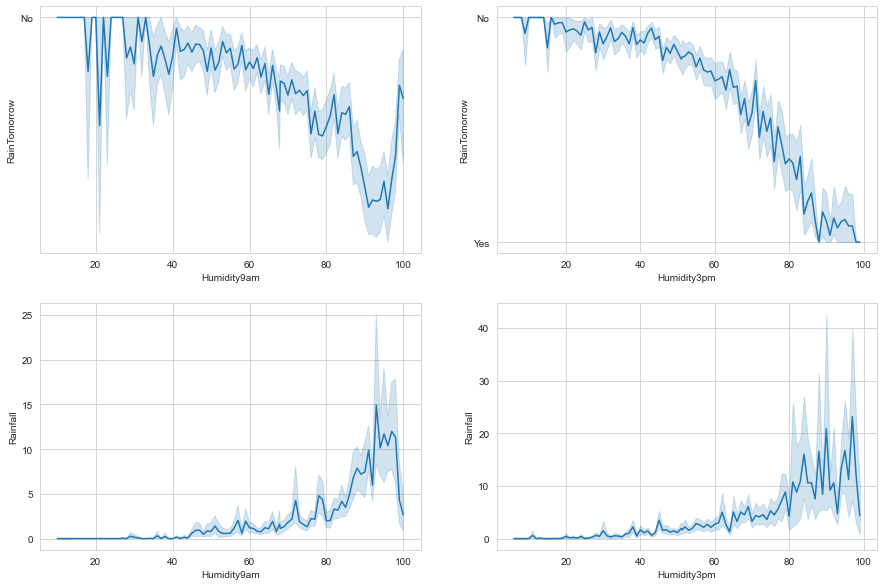

In [47]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

# Identifying the Outliers

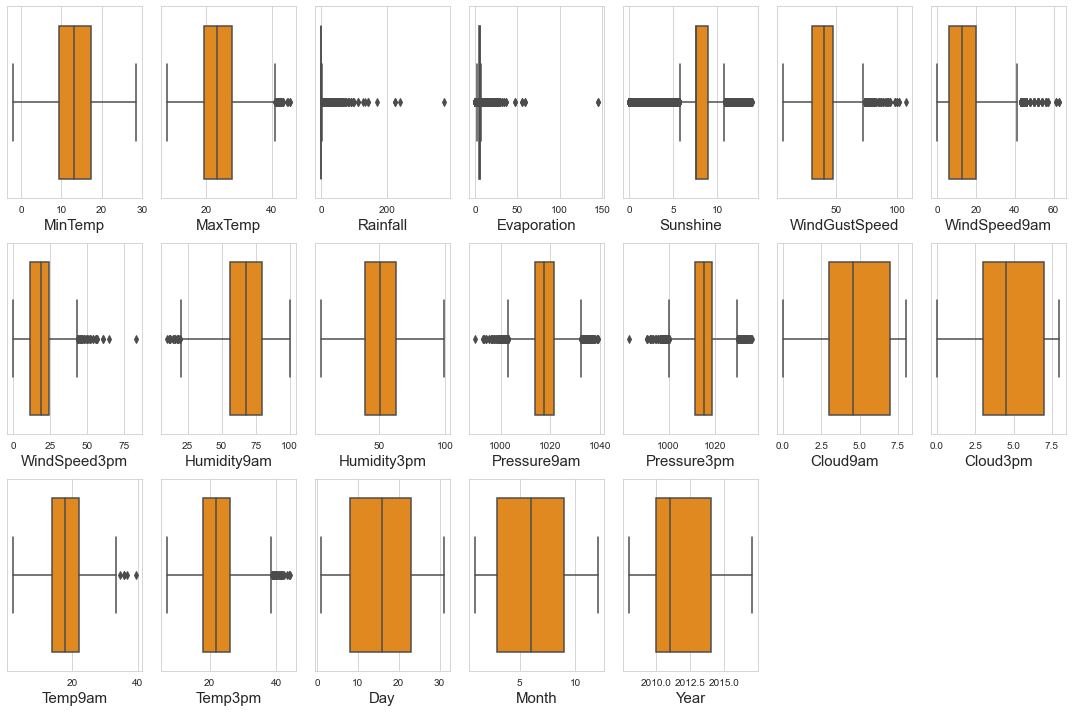

In [48]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

We can see outliers present in the columns : MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm, RainToday & RainTomorrow.

In [50]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

from scipy.stats import zscore
z=np.abs(zscore(feature))

z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.570089e-01,0.206021,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
1,2.028121e-01,0.264165,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2,3.009450e-01,0.264165,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
3,6.771214e-01,0.264165,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
4,1.380408e+00,0.167258,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.264165,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
8421,2.355231e-01,0.264165,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
8422,4.972110e-01,0.264165,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099
8423,5.135665e-01,0.264165,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,0.280424,0.203299,0.474684,0.598279


In [51]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


In [52]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", new_df.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-new_df.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (8425, 25)
Shape of the dataframe after removing outliers:  (7987, 25)
Percentage of data loss post outlier removal:  5.198813056379822


In [53]:
df=new_df.copy()

In [54]:
df.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.519090
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

In [56]:
#Removing skewness using log transformation
df["Sunshine"] = np.log1p(df["Sunshine"])
df["Rainfall"] = np.log1p(df["Rainfall"])
df["Evaporation"] = np.log1p(df["Evaporation"])
df["WindSpeed9am"] = np.log1p(df["WindSpeed9am"])
df["WindGustSpeed"] = np.log1p(df["WindGustSpeed"])

In [66]:
#encoding the catagorical col
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[categorical_columns]= df[categorical_columns].apply(le.fit_transform)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.325891,0.717325,0.765071,13,0.943907,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,0.717325,0.765071,14,0.943907,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,0.717325,0.765071,15,0.947405,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,0.717325,0.765071,4,0.891821,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.423036,0.717325,0.765071,13,0.938266,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,0.717325,0.765071,0,0.914863,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,0.717325,0.765071,6,0.883605,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,0.717325,0.765071,3,0.929876,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,0.717325,0.765071,9,0.905894,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


In [67]:
#Checking the corelation between feature and label
cor =df.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.011222,0.107710,0.071659,-0.037707,0.264276,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.070547,0.314901,-0.020476,-0.154935,0.270297,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.236669,0.416580,0.254373,-0.237955,0.171401,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.011222,0.070547,-0.236669,1.000000,-0.167899,-0.173446,0.129908,0.077992,0.155740,0.116669,...,-0.029992,0.297991,0.262238,-0.099450,-0.246783,0.940728,0.322475,-0.017729,-0.005049,0.003696
Evaporation,0.107710,0.314901,0.416580,-0.167899,1.000000,0.308788,-0.104590,0.121262,-0.076799,-0.038478,...,-0.243771,-0.090599,-0.124501,0.383166,0.406960,-0.158224,-0.079439,0.008384,-0.039054,0.144208
Sunshine,0.071659,-0.020476,0.254373,-0.173446,0.308788,1.000000,-0.046518,0.008409,-0.035676,-0.029064,...,-0.020579,-0.351083,-0.374739,0.125824,0.266762,-0.155173,-0.253880,-0.002506,0.002354,0.125598
WindGustDir,-0.037707,-0.154935,-0.237955,0.129908,-0.104590,-0.046518,1.000000,-0.004176,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.264276,0.270297,0.171401,0.077992,0.121262,0.008409,-0.004176,1.000000,-0.053900,0.087607,...,-0.313774,-0.001713,0.049412,0.247718,0.138039,0.073925,0.153772,-0.006135,0.048966,-0.008470
WindDir9am,-0.041030,-0.045231,-0.217160,0.155740,-0.076799,-0.035676,0.405681,-0.053900,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.116669,-0.038478,-0.029064,0.507292,0.087607,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


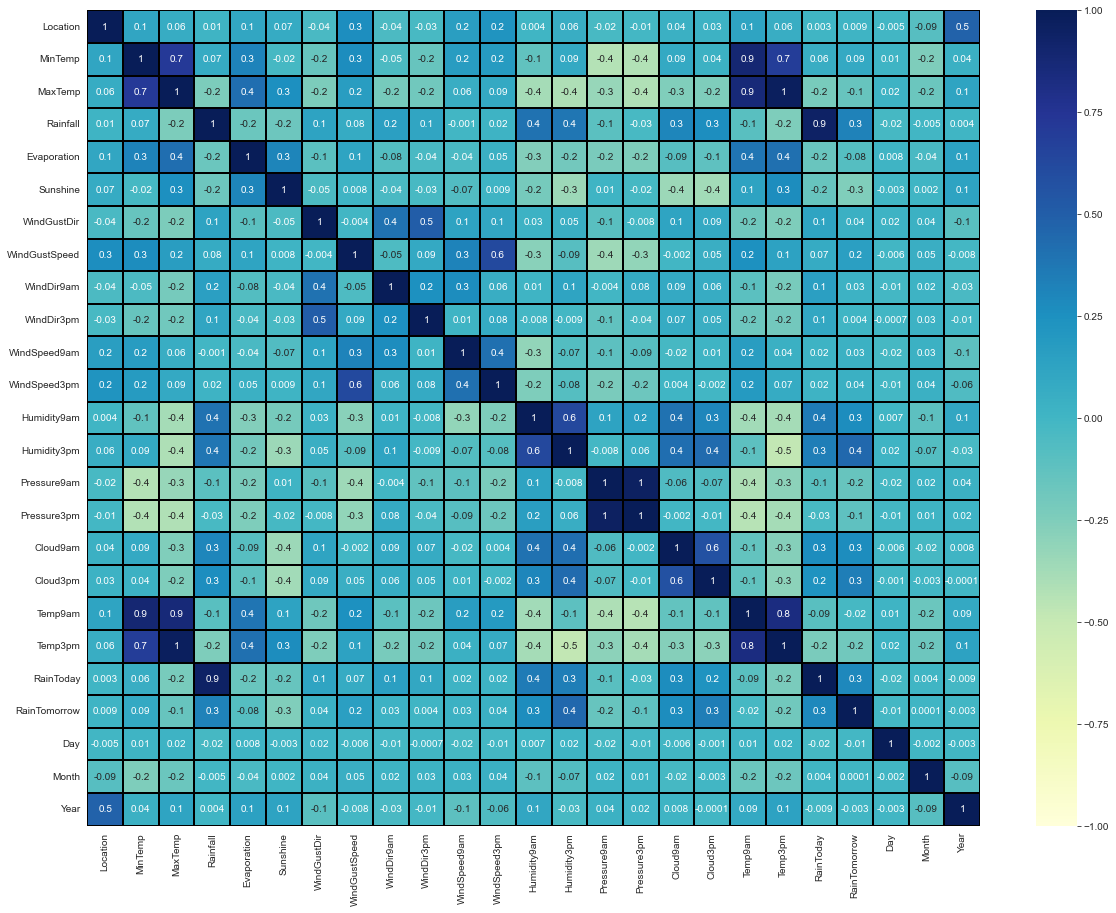

In [68]:
plt.figure(figsize=(20,15))    
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

From the above correlation heat map, we see that there is very high correlation between the different variables apart from our target variables, this might lead to some multicollinearity problems.

RainTomorrow
Humidity3pm, Cloud3pm, Rainfall & RainToday are highly positively correlated with RainTomorrow.

Sunshine & Temp3pm are highly negatively correlated with RainTomorrow.

Rainfall
RainToday, Humidity9am, Humidity3pm, Cloud9am, Cloud3pm & RainTomorrow, are higly positively correlated with our target Rainfall.

Temp3pm, Sunshine, MaxTemp & Evaporation are highly negatively correlated with our target Rainfall.

# Model Building(Rain-Tomorrow)

In [70]:
x = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

In [71]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.469758,0.331468,0.223353,1.229267,0.504826,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.623444,0.331468,0.223353,1.441960,0.504826,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.623444,0.331468,0.223353,1.654654,0.623203,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.623444,0.331468,0.223353,-0.684977,-1.257719,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.795629,0.331468,0.223353,1.229267,0.313925,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.623444,0.331468,0.223353,-1.535751,-0.477992,0.377044,-1.542755,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.623444,0.331468,0.223353,-0.259589,-1.535749,0.377044,-1.089991,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.623444,0.331468,0.223353,-0.897670,0.030013,0.377044,1.400214,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.623444,0.331468,0.223353,0.378492,-0.781491,0.595344,-1.089991,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.567312,Location
1,8.604032,MinTemp
2,26.344384,MaxTemp
3,9.434903,Rainfall
4,1.396528,Evaporation
5,1.409083,Sunshine
6,1.622824,WindGustDir
7,2.063811,WindGustSpeed
8,1.438444,WindDir9am
9,1.498504,WindDir3pm


We can see that we have high multicolinearity in features: MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [74]:
# Dropping Temp3pm column
X.drop("Temp3pm",axis=1,inplace=True)

In [75]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.566159,Location
1,8.566545,MinTemp
2,9.591746,MaxTemp
3,9.434135,Rainfall
4,1.394702,Evaporation
5,1.407130,Sunshine
6,1.619908,WindGustDir
7,2.057918,WindGustSpeed
8,1.438144,WindDir9am
9,1.497325,WindDir3pm


In [76]:
# Dropping Pressure9am column
X.drop("Pressure9am",axis=1,inplace=True)

In [77]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.566006,Location
1,8.407415,MinTemp
2,9.194366,MaxTemp
3,9.413529,Rainfall
4,1.388713,Evaporation
5,1.406983,Sunshine
6,1.604968,WindGustDir
7,2.043039,WindGustSpeed
8,1.411949,WindDir9am
9,1.432190,WindDir3pm


In [78]:
# Dropping Temp9am column
X.drop("Temp9am",axis=1,inplace=True)

In [79]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.565292,Location
1,4.512762,MinTemp
2,5.267487,MaxTemp
3,9.399555,Rainfall
4,1.386621,Evaporation
5,1.404677,Sunshine
6,1.602958,WindGustDir
7,2.003923,WindGustSpeed
8,1.411792,WindDir9am
9,1.431876,WindDir3pm


Now we can see that we have removed all the multi-colinearity and it dont exist in the dataset

In [80]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

We can see that there is a significant difference in the classes hence lets fix this usin g SMOTE

In [81]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [82]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

# Finding the best random state

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from sklearn import metrics
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [86]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9378210327115437  on Random_state  53


In [87]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# LogisticRegression

In [88]:

lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print('Acuracy score is- ' ,  accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Acuracy score is-  0.7623682076236821
[[1479  392]
 [ 487 1341]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1871
           1       0.77      0.73      0.75      1828

    accuracy                           0.76      3699
   macro avg       0.76      0.76      0.76      3699
weighted avg       0.76      0.76      0.76      3699



# RandomForestClassifier

In [89]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.9370100027034334
[[1751  120]
 [ 113 1715]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1871
           1       0.93      0.94      0.94      1828

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



# DecisionTreeClassifier

In [90]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8686131386861314
[[1609  262]
 [ 224 1604]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1871
           1       0.86      0.88      0.87      1828

    accuracy                           0.87      3699
   macro avg       0.87      0.87      0.87      3699
weighted avg       0.87      0.87      0.87      3699



# SVC

In [91]:
svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.8540145985401459
[[1572  299]
 [ 241 1587]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1871
           1       0.84      0.87      0.85      1828

    accuracy                           0.85      3699
   macro avg       0.85      0.85      0.85      3699
weighted avg       0.85      0.85      0.85      3699



# GradientBoostingClassifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predgb = gb.predict(x_test)
print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test, predgb))

0.8569883752365505
[[1623  248]
 [ 281 1547]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1871
           1       0.86      0.85      0.85      1828

    accuracy                           0.86      3699
   macro avg       0.86      0.86      0.86      3699
weighted avg       0.86      0.86      0.86      3699



# Checking for cross validation score

In [94]:
#Checking cross validation score of LogisticRegression Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,X,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.7075425790754258


In [97]:
# Checking cross validation score of RandomForest Classifier:

scr = cross_val_score(rf,X,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

Cross validation score for RandomForest is 0.7923763179237632


In [98]:
# Checking cross validation score of DecisionTree Classifier:
scr = cross_val_score(dt,X,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

Cross validation score for DecisionTree is  0.7254663422546634


In [99]:
# Checking cross validation score of SVC:

scr = cross_val_score(svc,X,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.7347120843471209


In [100]:
# Checking cross validation score of GradientBoostingClassifier:

scr = cross_val_score(gb,X,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.6796431467964315


so from the above training we can conclude that random forest classifier is our best model due to high accuacy and cross validation score

# Hyperparameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [103]:
GCV = GridSearchCV(RandomForestClassifier(),parameter)
GCV.fit(x_train,y_train)
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 70}

In [114]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 50, max_depth=50 ,max_features='auto')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.9343065693430657


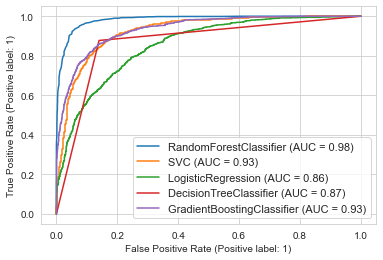

In [116]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_) # ax_=Axes with confusion matrix
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax=disp.ax_)


plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving model

In [118]:
import joblib
joblib.dump(Final_mod,'RainTomorrow_final.pkl')

['RainTomorrow_final.pkl']

# Prediction for Rainfall

In [119]:
x1 = df.drop("Rainfall", axis=1)
y1 = df["Rainfall"]

In [120]:
#Feature Scaling using Standard Scalarization
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
X1

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.331468,0.223353,1.229267,0.504826,1.250245,1.400214,0.554977,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.331468,0.223353,1.441960,0.504826,-0.277857,1.626597,-0.257408,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.331468,0.223353,1.654654,0.623203,1.250245,1.626597,0.534552,...,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.331468,0.223353,-0.684977,-1.257719,0.377044,-1.769138,0.296885,...,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.331468,0.223353,1.229267,0.313925,-1.369358,-0.184462,0.069171,...,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.331468,0.223353,-1.535751,-0.477992,0.377044,-1.542755,0.373619,...,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.331468,0.223353,-0.259589,-1.535749,0.377044,-1.089991,0.373619,...,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.331468,0.223353,-0.897670,0.030013,0.377044,1.400214,0.199538,...,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.331468,0.223353,0.378492,-0.781491,0.595344,-1.089991,0.373619,...,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


# Checking VIF (Multicolinearity)

In [121]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1.values,i)
              for i in range(len(X1.columns))]
vif["Features"] = X1.columns

# Let's check the values
vif


,VIF values,Features
0,1.577197,Location
1,8.606049,MinTemp
2,26.314173,MaxTemp
3,1.395790,Evaporation
4,1.418178,Sunshine
5,1.625028,WindGustDir
6,2.114795,WindGustSpeed
7,1.438157,WindDir9am
8,1.498264,WindDir3pm
9,1.547140,WindSpeed9am


In [122]:
# Dropping high VIF columns
X1.drop("Temp3pm",axis=1,inplace=True)

In [123]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1.values,i)
              for i in range(len(X1.columns))]
vif["Features"] = X1.columns

# Let's check the values
vif


,VIF values,Features
0,1.576067,Location
1,8.568357,MinTemp
2,9.574509,MaxTemp
3,1.393986,Evaporation
4,1.416206,Sunshine
5,1.622124,WindGustDir
6,2.109100,WindGustSpeed
7,1.437864,WindDir9am
8,1.497108,WindDir3pm
9,1.545958,WindSpeed9am


In [124]:
# Dropping high VIF columns
X1.drop("Pressure9am",axis=1,inplace=True)

In [125]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1.values,i)
              for i in range(len(X1.columns))]
vif["Features"] = X1.columns

# Let's check the values
vif


,VIF values,Features
0,1.576006,Location
1,8.408999,MinTemp
2,9.172583,MaxTemp
3,1.388109,Evaporation
4,1.416136,Sunshine
5,1.606724,WindGustDir
6,2.090727,WindGustSpeed
7,1.411520,WindDir9am
8,1.431716,WindDir3pm
9,1.532258,WindSpeed9am


In [126]:
# Dropping high VIF columns
X1.drop("Temp9am",axis=1,inplace=True)

In [127]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1.values,i)
              for i in range(len(X1.columns))]
vif["Features"] = X1.columns

# Let's check the values
vif

,VIF values,Features
0,1.575425,Location
1,4.504266,MinTemp
2,5.261459,MaxTemp
3,1.385943,Evaporation
4,1.414020,Sunshine
5,1.604613,WindGustDir
6,2.054891,WindGustSpeed
7,1.411342,WindDir9am
8,1.431439,WindDir3pm
9,1.531058,WindSpeed9am


now no multicoliniarity issue we are good to go

# Finding the best random state

In [129]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=.30, random_state=i)
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9259350189535709  on Random_state  23


In [130]:
x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=.30,random_state=maxRS)

# RandomForestRegressor

In [131]:
# checking r2_score for RandomForestRegressor
RFr = RandomForestRegressor()
RFr.fit(x_train,y_train)
pred_RFr = RFr.predict(x_test)
print("R2_score :",r2_score(y_test,pred_RFr))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_RFr))

# Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,pred_RFr))

# Root Mean Squared error(RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_RFr)))

R2_score : 0.9252251877250262
MAE: 0.05136606303343931
MSE: 0.0064829153765999245
RMSE: 0.08051655343219756


# Linear Regression

In [132]:
# Checking r2_score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
print("R2_score:",r2_score(y_test,pred_LR))
print("MAE:",metrics.mean_absolute_error(y_test,pred_LR))
print("MSE:",metrics.mean_squared_error(y_test,pred_LR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_LR)))

R2_score: 0.8998141917871508
MAE: 0.06474900604105917
MSE: 0.008686028046339202
RMSE: 0.09319886290260843


# Support Vector Machine

In [133]:
# checking r2_score for SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print("r2_score:",r2_score(y_test,pred_svr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_svr))
print("MSE:",metrics.mean_squared_error(y_test,pred_svr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_svr)))

r2_score: 0.8788557535389097
MAE: 0.08735141044602819
MSE: 0.010503107587634382
RMSE: 0.10248467001280914


# KNN Regressor

In [136]:
# Checking r2_score for KNN
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("R2_score:",r2_score(y_test,pred_knn))
print("MAE:",metrics.mean_absolute_error(y_test,pred_knn))
print("MSE:",metrics.mean_squared_error(y_test,pred_knn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_knn)))

R2_score: 0.8566049550433759
MAE: 0.06564649833981
MSE: 0.012432233710717965
RMSE: 0.11149992695386829


# Gradient Boosting Regressor

In [137]:
# Checking r2_score for GBR
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB = GB.predict(x_test)
print("R2_score:",r2_score(y_test,pred_GB))
print("MAE:",metrics.mean_absolute_error(y_test,pred_GB))
print("MSE:",metrics.mean_squared_error(y_test,pred_GB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_GB)))

R2_score: 0.9053886412995792
MAE: 0.06034217519393591
MSE: 0.008202727809792879
RMSE: 0.09056891193888153


# Cross Validation Score

In [138]:
# Checking cross valiodation score for RandomForestRegressor
print("Cross_Validation_Score",cross_val_score(RFr,X1,y1).mean())

Cross_Validation_Score 0.9079780379316844


In [139]:
# Checking cross valiodation score for LinearRegressor
print("Cross_Validation_Score",cross_val_score(LR,X1,y1).mean())

Cross_Validation_Score 0.8919363722566749


In [140]:
# Checking cross valiodation score for SVR
print("Cross_Validation_Score",cross_val_score(svr,X1,y1).mean())

Cross_Validation_Score 0.8522582127031564


In [141]:
# Checking cross valiodation score for KNNRegressor
print("Cross_Validation_Score",cross_val_score(knn,X1,y1).mean())

Cross_Validation_Score 0.8425996211526403


In [143]:
# Checking cross valiodation score for GradientBoosting Regressor 
print("Cross_Validation_Score",cross_val_score(GB,X1,y1).mean())

Cross_Validation_Score 0.8964610603719642


From this we can predict that GradientBoostingregressor is our best fit model due les difference between r2 score and cross validation score

# Hyperparameter Tuning

In [146]:
grid_param = {
    
    'max_depth' : range(10,25),
    'min_samples_split' : range(3,8),
    'learning_rate': np.arange(0.1,0.2)
}

GRD = GridSearchCV(GradientBoostingRegressor(),param_grid =grid_param)
GRD.fit(x_train,y_train)
GRD.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 5}

In [147]:
rainfall_final =GradientBoostingRegressor(learning_rate=0.1, min_samples_split=5, max_depth=10)
rainfall_final.fit(x_train,y_train)
pred = rainfall_final.predict(x_test)
print("RMSE value :",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2_score :',r2_score(y_test,pred)*100)

RMSE value : 0.08086440963349746
R2_score : 92.4577691811868


so we got r2 score of 92% post tuning.

# Saving the model

In [149]:
import joblib
joblib.dump(Final_mod,'Rainfall_final.pkl')

['Rainfall_final.pkl']